# TSF GRIPNOV21 Task-2
# Exploratory Data Analysis - Retail
## Author : Uddeshya Sharma

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\hp\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Collection and processing

In [2]:
data_df = pd.read_csv("C:\\Users\\hp\\Downloads\\SampleSuperstore.csv")

In [3]:
data_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data_df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
data_df.shape

(9994, 13)

In [6]:
data_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data_df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Checking for null or duplicate values (Mining)

In [9]:
data_df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
#To check for duplicate elements in the data
data_df.duplicated().sum()

17

In [12]:
data_df.drop_duplicates(inplace = True)

In [13]:
#To check for number of unique values for every attribute
data_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [14]:
#As there is only one country we will drop that column
data_df = data_df.drop('Country',axis=1)

In [15]:
data_df.shape

(9977, 12)

In [16]:
#To check the correlations between the variables
correlation = data_df.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [17]:
data_df = data_df.drop('Postal Code',axis=1)

## Data Visualization to gather some useful insights

In [18]:
correlation = data_df.corr()
correlation

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


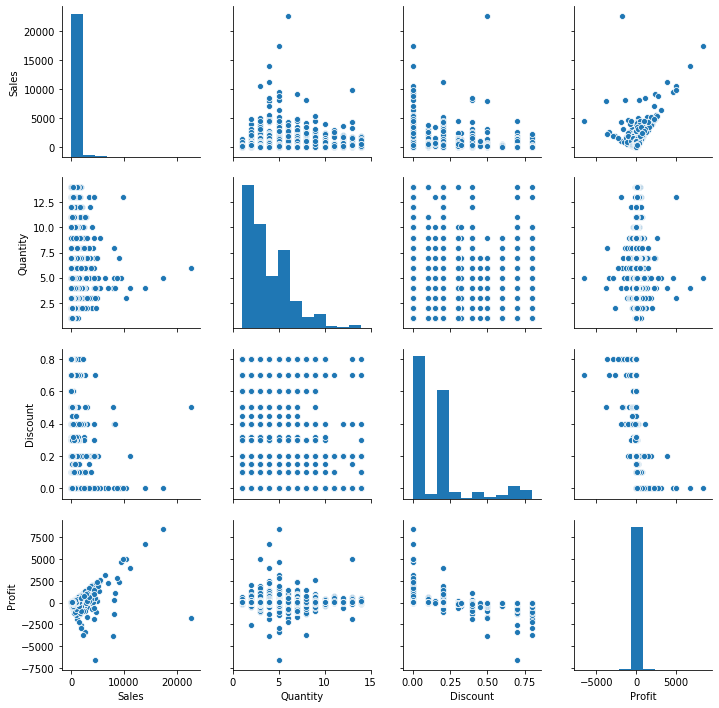

In [19]:
sns.pairplot(data_df)

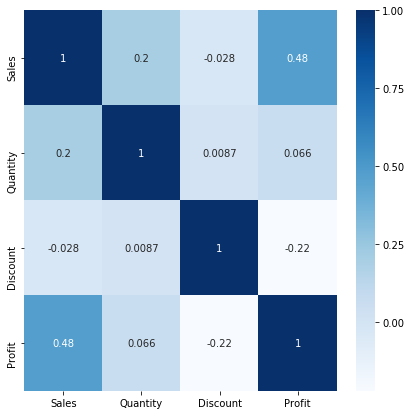

In [20]:
plt.figure(figsize = (7,7))
sns.heatmap(correlation, annot = True, cmap='Blues')

In [21]:
#To check for covariance of columns
covariance = data_df.cov()
covariance

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


## Exploratory Data Analysis

### Analysis on Catorigal Data

In [22]:
data_category = data_df.select_dtypes(include='object')
data_category.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category'],
      dtype='object')

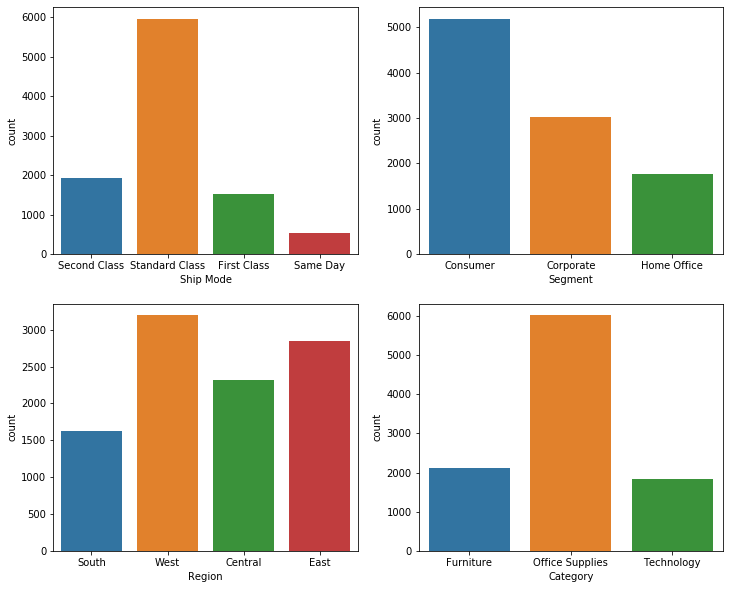

In [23]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,10
figure,ax = plt.subplots(2,2)

plt.subplot(2,2,1)
sns.countplot(data_df['Ship Mode'])

plt.subplot(2,2,2)
sns.countplot(data_df['Segment'])

plt.subplot(2,2,3)
sns.countplot(data_df['Region'])

plt.subplot(2,2,4)
sns.countplot(data_df['Category'])

plt.show()

### Analysis on numerical Data

In [24]:
data_numerical = data_df.select_dtypes(include = np.number)
data_numerical.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

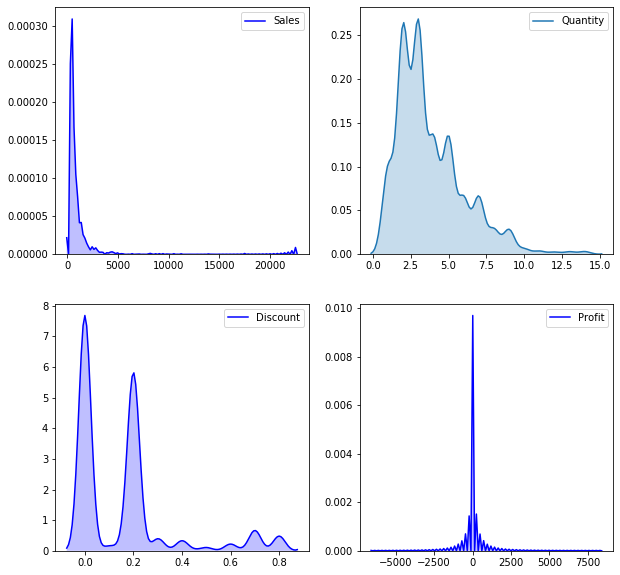

In [25]:
rcParams['figure.figsize'] = 10,10
figure,ax = plt.subplots(2,2)

plt.subplot(2,2,1)
sns.kdeplot(data_df['Sales'],color='b',shade='True')

plt.subplot(2,2,2)
sns.kdeplot(data_df['Quantity'],shade='True')

plt.subplot(2,2,3)
sns.kdeplot(data_df['Discount'],color='b',shade='True')

plt.subplot(2,2,4)
sns.kdeplot(data_df['Profit'],color='b',shade='True')

plt.show()

### Category VS Quantity

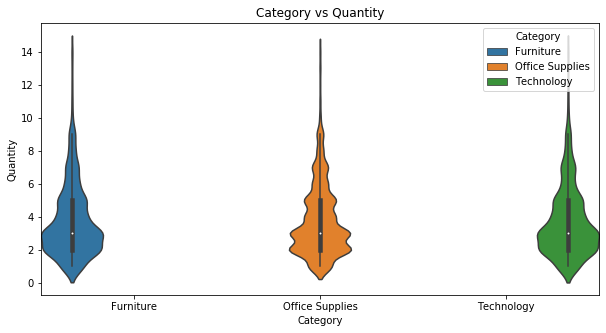

In [26]:
plt.figure(figsize=(10,5))
sns.violinplot('Category','Quantity', data=data_df, hue='Category',width=1)
plt.title('Category vs Quantity')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

### Number of stores in each state

In [27]:
# Number of records in each State
data_df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

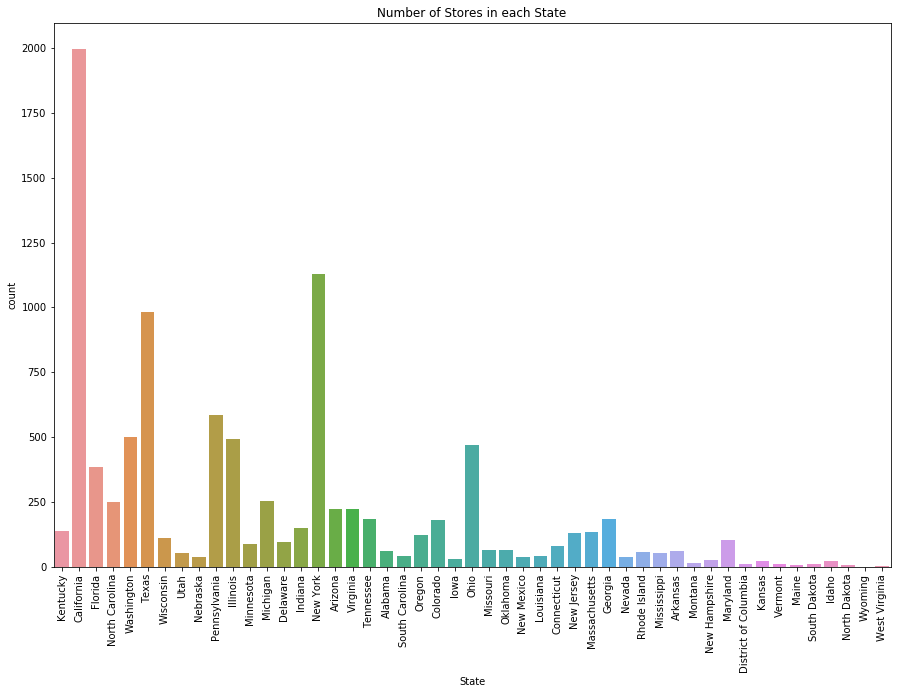

In [28]:
plt.figure(figsize = (15,10))
sns.countplot(x = data_df['State'])
plt.xticks(rotation = 90)
plt.title("Number of Stores in each State")
plt.show()

From the above plot we can see that the number of stores in the state of California is the highest with the value of 1996

### Sub-Category VS Number of items sold

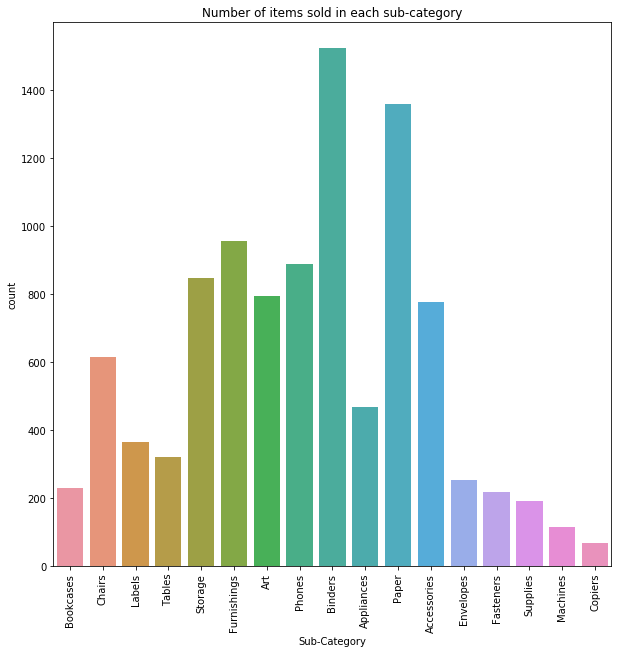

In [29]:
plt.figure(figsize = (10,10))
sns.countplot(x = data_df['Sub-Category'])
plt.xticks(rotation = 90)
plt.title("Number of items sold in each sub-category")
plt.show()

Sub-Category "Binders" has the highest number of items which is above 1400 While the least number of items is in Sub-Category "Copiers" which is well below 200

### Product categories wise analysis

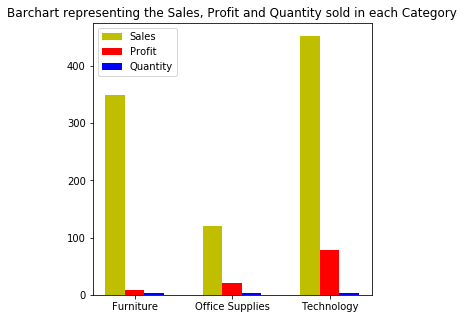

In [30]:
plt.figure(figsize=(5,5))

X = np.arange(len(data_df['Category'].value_counts()))

plt.bar(X, data_df.groupby(['Category'])['Sales'].mean(), color = 'y', width = 0.2)
plt.bar(X + 0.2, data_df.groupby(['Category'])['Profit'].mean(), color = 'r', width = 0.2)
plt.bar(X + 0.4, data_df.groupby(['Category'])['Quantity'].mean(), color = 'b', width = 0.2)

plt.xticks([i + 0.2 for i in range(3)], ['Furniture','Office Supplies', 'Technology'])
plt.legend(['Sales', 'Profit', 'Quantity'])
plt.title("Barchart representing the Sales, Profit and Quantity sold in each Category")
plt.show()

Technology Category has the highest average sales. Profit earned by this category is also the highest. Office supplies get the least average sales among the 3 categories.

### Sales and Profits for different Sub-Categories

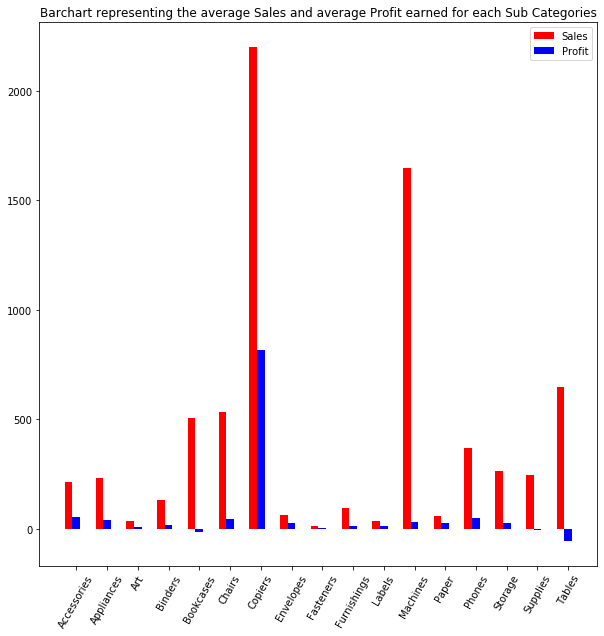

In [31]:
plt.figure(figsize=(10,10))

X = np.arange(len(data_df['Sub-Category'].value_counts()))

plt.bar(X, data_df.groupby(['Sub-Category'])['Sales'].mean(), color = 'r', width = 0.25)
plt.bar(X + 0.25, data_df.groupby(['Sub-Category'])['Profit'].mean(), color = 'b', width = 0.25)

plt.xticks([i + 0.25 for i in range(17)], data_df.groupby(['Sub-Category'])['Sales'].mean().index)

plt.legend(['Sales', 'Profit'])
plt.xticks(rotation = 60)
plt.title("Barchart representing the average Sales and average Profit earned for each Sub Categories")
plt.show()

Copiers has the highest sales as well as profit earned. The next sub category having the highest average sales in machines. Tables and supplies have decent average sales but it is currently in loss.

### Profit-Discount Relation

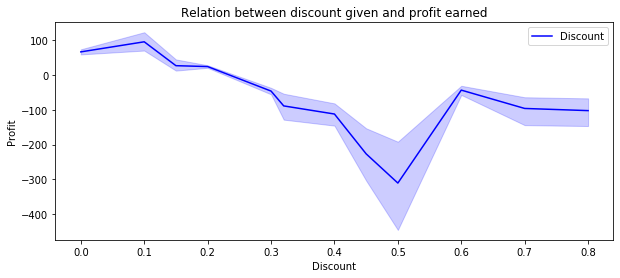

In [32]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data = data_df , color = 'b',label = 'Discount')
plt.title('Relation between discount given and profit earned')
plt.show()

### Sales and Profits for different States

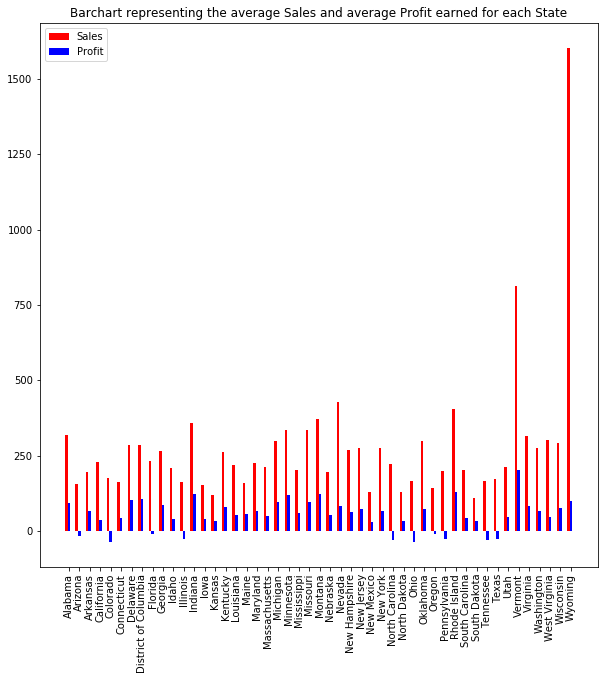

In [33]:
plt.figure(figsize=(10,10))

X = np.arange(len(data_df['State'].value_counts()))

plt.bar(X, data_df.groupby(['State'])['Sales'].mean(), color = 'r', width = 0.25)
plt.bar(X + 0.25, data_df.groupby(['State'])['Profit'].mean(), color = 'b', width = 0.25)

plt.xticks([i + 0.25 for i in range(49)], data_df.groupby(['State'])['Sales'].mean().index)

plt.legend(['Sales', 'Profit'])
plt.xticks(rotation = 90)
plt.title("Barchart representing the average Sales and average Profit earned for each State")
plt.show()

## Conclusions:
#### 1. From the above data analysis and visualization we can see which sub-categories are bringing in low/high profits. We can also observe which states have high or low sales.

####  2. There are a few states that have a very large number of stores. Proper business planning in these stores will hugely impact the profits of the company.

####  3. States with few superstores should be focused more on expanding as it could be a potential for new customers.

####  4. There are some sub-categories which have decent sales but are currently in loss. Business plans need to be implemented to transforn these losses into profits.

####  5. From the discount-profit line chart we can see that as the discount increases the loss incurred by the store also increases. So, discounts during festivals, clearance sales, end of season sales, etc are affecting the profit earned during the long run. But, discounts cannot be stopped as they are required so that the stores can make space for new stock. Discounts also gains the company long-term customers which are very necessary for a company's growth.

#### 6. All the states have some decent sales, Wyoming having most sales, second to which is Vermont. But, some of the states are currently in loss and can affect the company's turnover on the long term. A proper business plan has to be implemented to reduce these losses.

# *******End of the task*******